## Machine Learning - Random Forest

Reto de clasificación de machine learning en el que dado un dataset hay que realizar un modelo predictivo empleando random forest.

✅ Task 1 → Análisis exploratorio

✅ Task 2 → Predicción empleando Random Forest


**Roadmap**

Antes de lanzarnos de lleno a la programación, deberíamos trazar una breve guía para mantenernos en el camino. Los siguientes pasos constituyen la base de cualquier flujo de trabajo de aprendizaje automático una vez que tenemos un problema y un modelo en mente:

* 1) Plantear la pregunta y determinar los datos necesarios
* 2) Adquirir los datos en un formato accesible
* 3) Identificar y corregir los puntos de datos/anomalías que faltan, según sea necesario
* 4) Preparar los datos para el modelo de aprendizaje automático
* 5) Establecer un punto de referencia que se pretende superar (en el caso de clasificación sería obtener un alto nivel de presición)
* 6) Entrenar el modelo con los datos de entrenamiento
* 7) Hacer predicciones con los datos de prueba
* 8) Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcular las métricas de rendimiento
* 9) Si el rendimiento no es satisfactorio, ajustar el modelo, adquiera más datos o pruebe otra técnica de modelización.
* 10) Interpretar el modelo y comunicar los resultados de forma visual y numérica

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../Practice/1-Random Forest/Data Sets/j0002_train.csv")

✅ **Task 1** → Análisis exploratorio

1) Leemos data frame, verificamos con head y tail el inicio y final del dataframe.

In [4]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [5]:
df.tail()

,feature1,feature2,feature3,feature4,feature5,feature6,target
2095,-0.947002,0.174969,-0.180249,0.118236,-0.143420,-0.359509,0
2096,-1.224148,0.029956,0.536684,0.888406,0.119460,0.378946,1
2097,-0.847593,1.538574,0.962409,1.966467,0.379934,0.737907,3
2098,1.472437,1.187695,1.015766,-1.103522,1.586722,0.182569,4
2099,-0.083489,-1.194784,-0.389204,-2.369081,0.382413,-0.900237,3


(array([427.,   0., 423.,   0.,   0., 419.,   0., 426.,   0., 405.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

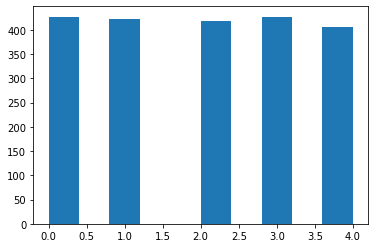

In [6]:
plt.hist(df.target)

In [7]:
df.target.unique()

array([4, 0, 1, 3, 2], dtype=int64)

Hay 5 características diferentes, distribuidas uniformemente.

### Identificar las anomalías/los datos que faltan

In [10]:
print('The shape of our features is:', df.shape)

The shape of our features is: (2100, 7)


In [11]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


No hay puntos de datos que aparezcan inmediatamente como anómalos y no hay ceros en ninguna de las columnas de medición. Y otro hecho importante es que no hay ninguna variable categórica, por lo que, no hay necesidad de hacer ningún conjunto de datos dummie.

In [12]:
colnames = df.columns.values.tolist()

In [13]:
df_features=df[colnames[:6]]

## Random Forest Classification

In [54]:
#Dividir el conjunto de datos en partes de entrenamiento y de prueba de forma aleatoria.
#Utilizamos el método de numpy random.uniform, para seleccionar aleatoriamente estos conjuntos.
#Generaremos una columna auxiliar en el dataset,  con el 80% true y el 20% false, (entrenamiento y testing)
df["is_train"] = np.random.uniform(0,1,len(df))<0.8

In [55]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target,is_train
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4,True
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0,True
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1,True
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3,True
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0,False


(array([ 425.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1675.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

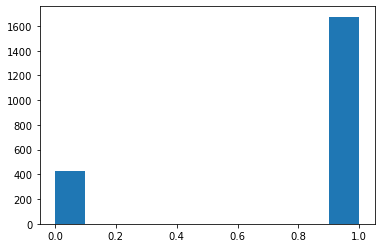

In [56]:
#With this plot, we can see how the data is splited, 0.8 true and 0.2 false.
plt.hist(df.is_train.astype(np.float32))

Observamos gráficamente como hay aproximadamente 1600 datos en *true* y otros 400 en *false* que indica la división del training vs testing.

In [57]:
train, test = df[df["is_train"]==True], df[df["is_train"]==False]

In [58]:
predictors = colnames[:6]
target = colnames[6]

In [59]:
predictors, target #Observamos que se hallan seleccionado correctamente las columnas X e Y

(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6'],
 'target')

In [60]:
def RandomForestClassifier(rang, jump):
    from sklearn.ensemble import RandomForestClassifier
    score=[]
    for i in range (100, rang, jump):
        forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=i, random_state=i)
        forest.fit(train[predictors],train[target])
        print ("El bosque de clasificación aleatorio con ", i, " bosques, tiene un un Score de: %0.3f" %forest.oob_score_)
        score.append(np.round(forest.oob_score_,3))
    plt.plot(range(100,rang,jump), score, "ro-")
    plt.xlabel("N° árboles en bosque")
    plt.ylabel("Score obtenido")
    plt.title("Score respeco a árboles")
    plt.figure(figsize=(8,4))
    plt.show()
    print ("El promedio de presición obtenido es %0.3f" %np.mean(score))
    return(forest)

El bosque de clasificación aleatorio con  100  bosques, tiene un un Score de: 0.762
El bosque de clasificación aleatorio con  200  bosques, tiene un un Score de: 0.770
El bosque de clasificación aleatorio con  300  bosques, tiene un un Score de: 0.771
El bosque de clasificación aleatorio con  400  bosques, tiene un un Score de: 0.776
El bosque de clasificación aleatorio con  500  bosques, tiene un un Score de: 0.767
El bosque de clasificación aleatorio con  600  bosques, tiene un un Score de: 0.767
El bosque de clasificación aleatorio con  700  bosques, tiene un un Score de: 0.774
El bosque de clasificación aleatorio con  800  bosques, tiene un un Score de: 0.777
El bosque de clasificación aleatorio con  900  bosques, tiene un un Score de: 0.773
El bosque de clasificación aleatorio con  1000  bosques, tiene un un Score de: 0.773
El bosque de clasificación aleatorio con  1100  bosques, tiene un un Score de: 0.777
El bosque de clasificación aleatorio con  1200  bosques, tiene un un Score

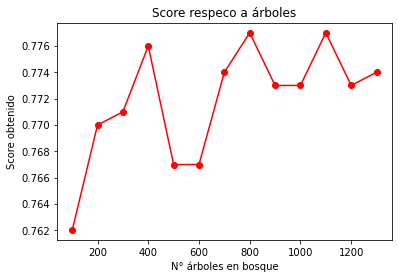

<Figure size 576x288 with 0 Axes>

El promedio de presición obtenido es 0.772


In [61]:
forest = RandomForestClassifier(1400, 100) #(Límite máximo de árboles y cantidad que añadirá por iteración)

In [63]:
print("La presición final del modelo es de %0.3f" %forest.oob_score_)

La presición final del modelo es de 0.774


## Random Forest Predictions

✅ Task 2 → Predicción empleando Random Forest

En primer lugar, queremos asegurarnos de que el modelo puede predecir en la parte de prueba del conjunto de datos, antes de cargar el conjunto de prueba.

En el 20% de **testing** tenemos las siguientes cantidades por conjunto:

In [80]:
unique, counts = np.unique(test[target], return_counts=True)
dict(zip(unique, counts))

{0: 93, 1: 98, 2: 87, 3: 65, 4: 82}

La predicción para dicho 20% de **testing** es:

In [81]:
preds = forest.predict(test[predictors])
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{0: 93, 1: 86, 2: 85, 3: 77, 4: 84}

In [82]:
crosstab = pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])
crosstab

Predictions,0,1,2,3,4
Actual,,,,,
0,80,5,6,2,0
1,5,74,5,12,2
2,3,5,66,5,8
3,1,2,4,54,4
4,4,0,4,4,70


In [83]:
test["Forest_Pred"] = preds

C:\Users\Kevin\AppData\Local\Temp/ipykernel_3412/3332716299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forest_Pred"] = preds


Text(0, 0.5, 'Frecuencia de los grupos')

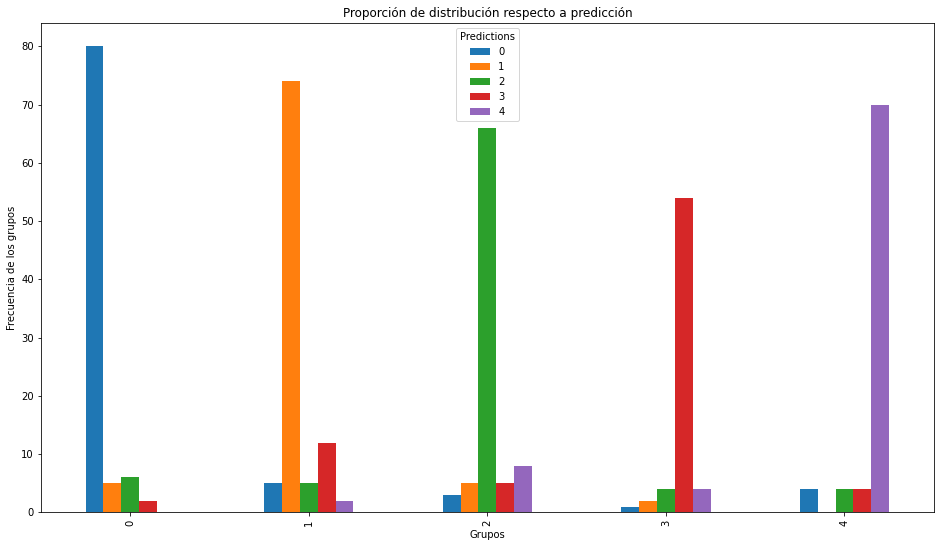

In [110]:
crosstab.plot(kind="bar", figsize=(16,9))
plt.title("Proporción de distribución respecto a predicción")
plt.xlabel("Grupos")
plt.ylabel("Frecuencia de los grupos")

**Conclusión:** Se observa que con el algritmo de Random Forest Classification, se puede obtener una presición del aproximada al 80%.

### Predicting the test data set

In [128]:
df_test = pd.read_csv("../../Practice/1-Random Forest/Data Sets/j0002_X_test.csv")

In [129]:
df_test.head()

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


In [130]:
df_test.shape

(900, 6)

In [147]:
pred = forest.predict(df_test)

In [148]:
results = pd.DataFrame(pred, columns=['Results'])  

In [149]:
results.to_csv("../../Practice/1-Random Forest/results.csv", index=False)

In [150]:
results = pd.read_csv("../../Practice/1-Random Forest/results.csv")

In [151]:
results

,Results
0,1
1,3
2,2
3,0
4,3
...,...
895,3
896,4
897,0
898,3
